In [1]:
import pandas as pd

#read in the data
df = pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')

#ensure data is imported
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [2]:
df.keys()#names of columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [3]:
df.shape#shape of dataset

(545, 13)

In [4]:
len(df.keys())#count of features

13

In [5]:
df.info()#information about dataset; no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe().transpose()#summary stats

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [7]:
import matplotlib.pyplot as plt#matplotlib for visualizations

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'area'}>]], dtype=object)

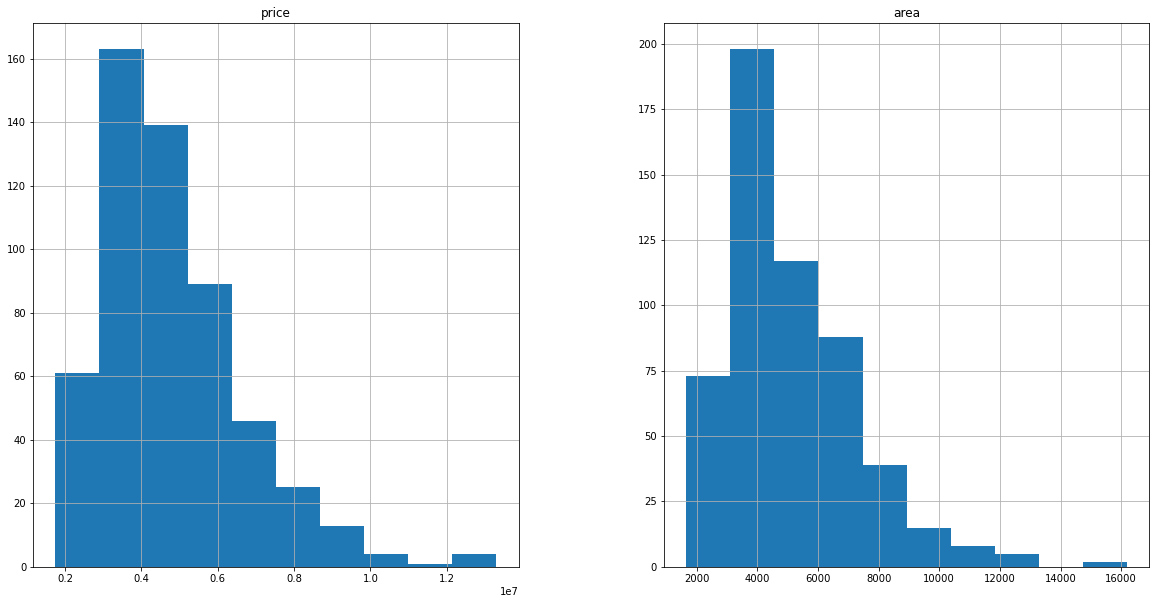

In [8]:
df[['price','area']].hist(figsize = (20,10))#area and price dist skewed right  

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'stories'}>,
        <AxesSubplot:title={'center':'parking'}>]], dtype=object)

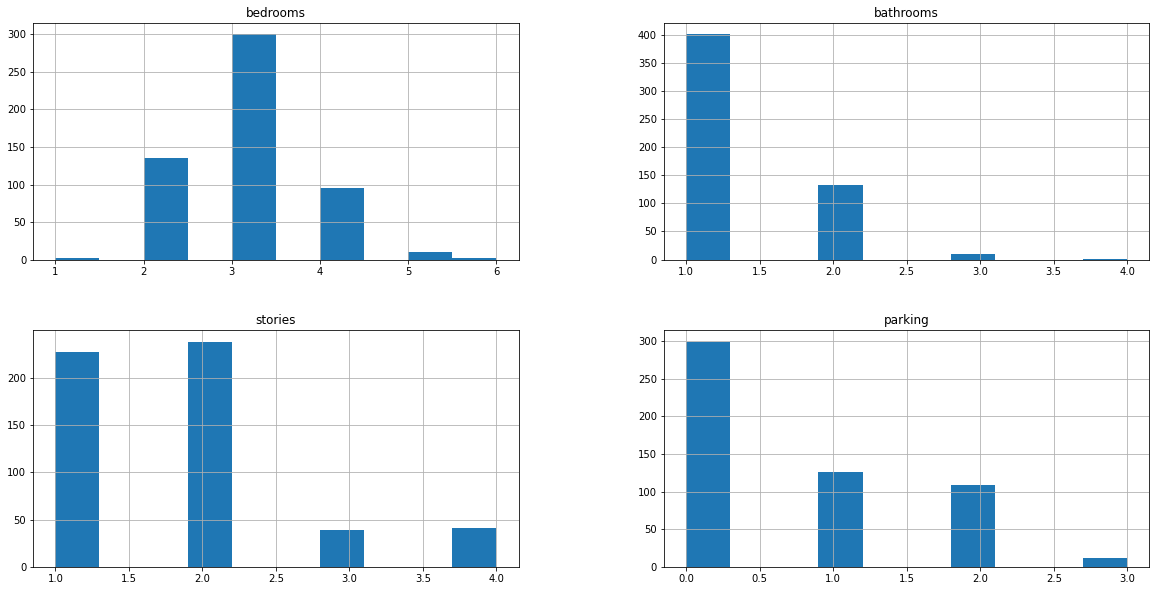

In [9]:
df.drop(['area','price'],axis=1).hist(figsize=(20,10))#dist of everything but area and price

<AxesSubplot:>

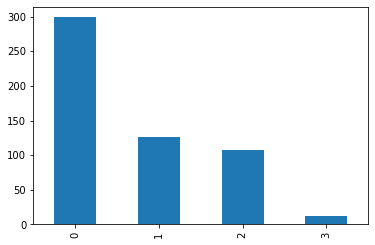

In [10]:
df.parking.value_counts().plot(kind='bar')#over 50 percent of houses in dataset have no parking

<AxesSubplot:>

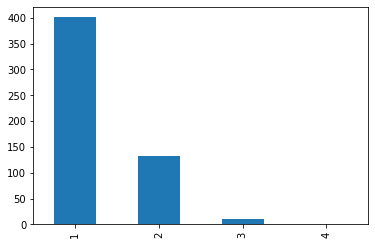

In [11]:
df.bathrooms.value_counts().plot(kind='bar')#73 percent of homes have 1 bathroom

<AxesSubplot:>

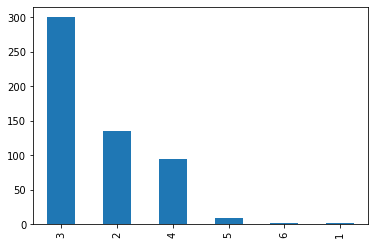

In [12]:
df.bedrooms.value_counts().plot(kind='bar')#55 percent of homes in dataset have 3 bedrooms

<AxesSubplot:>

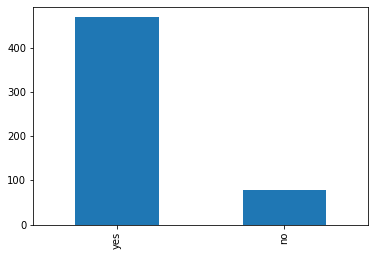

In [13]:
df.mainroad.value_counts().plot(kind='bar')#has a main road

<AxesSubplot:>

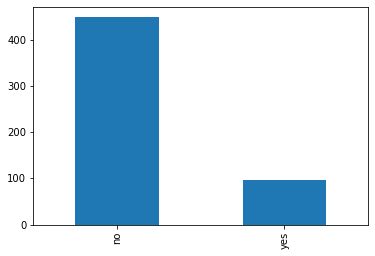

In [14]:
df.guestroom.value_counts().plot(kind='bar')#has guestroom

<AxesSubplot:>

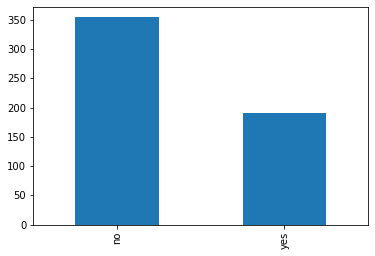

In [15]:
df.basement.value_counts().plot(kind='bar')#has basement

<AxesSubplot:>

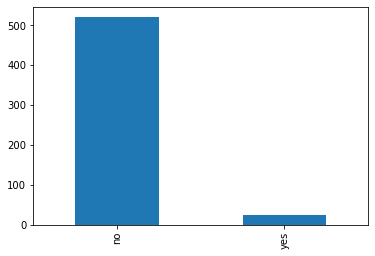

In [16]:
df.hotwaterheating.value_counts().plot(kind='bar')#most homes have no hot water heating

<AxesSubplot:>

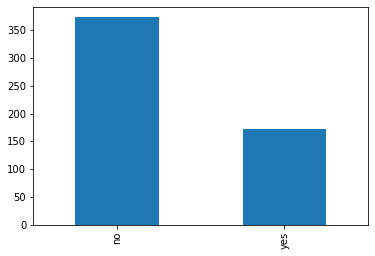

In [17]:
df.airconditioning.value_counts().plot(kind='bar')#70 percent of homes have no airconditioning

<AxesSubplot:>

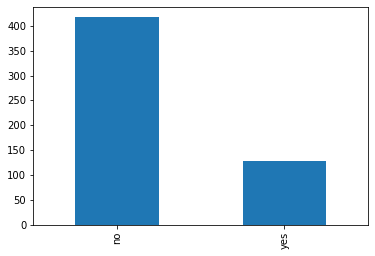

In [18]:
df.prefarea.value_counts().plot(kind='bar')#76 percent homes have no prefarea

<AxesSubplot:>

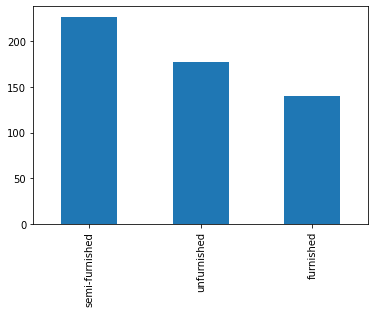

In [19]:
df.furnishingstatus.value_counts().plot(kind='bar')#needs converting to dummies

In [20]:
def convert_binary(column):#function to convert yes/no columns to binary
    if column == 'yes':
        column = 1
    else:
        column = 0
    return column

In [21]:
#subset of columns to convert to binary 0/1
columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','parking', 'prefarea']

In [22]:
for item in columns:#loop through columns and apply convert_binary
    df[item] = df[item].apply(convert_binary)

In [23]:
df.head()#check to ensure columns are converted

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,0,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,0,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,0,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,0,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,0,0,furnished


In [24]:
dummies = pd.get_dummies(df['furnishingstatus'], drop_first=True)#get dummy variables for furnishingstatus

In [25]:
dummies.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [26]:
df = pd.concat([df,dummies], axis=1)#concatenate dummies to original df

In [27]:
df.head()#ensure changes worked

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,0,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,0,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,0,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,0,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,0,0,furnished,0,0


In [28]:
df.drop('furnishingstatus', inplace=True, axis=1)#drop furnishingstatus from data set

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,0,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,0,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,0,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,0,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,0,0,0,0


<AxesSubplot:>

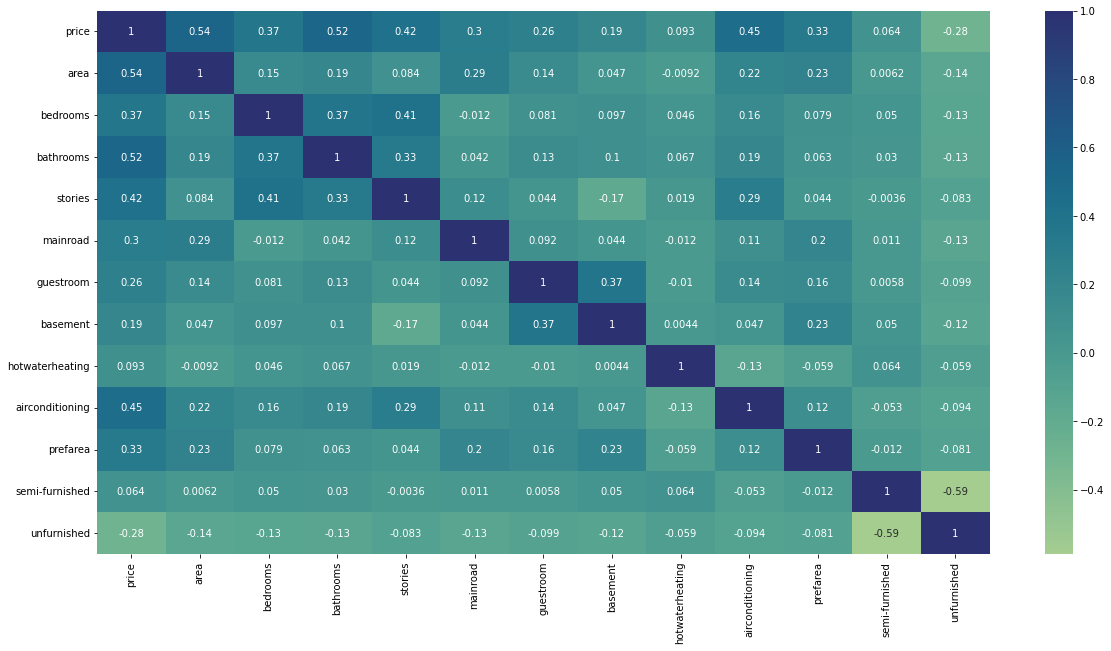

In [30]:
#Use heatmap to detect correlation between features
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.drop(['parking'], axis=1).corr(), cmap="crest", annot=True)#check for correlation between variables


In [31]:
import numpy as np#import numpy for log

In [32]:
df['price'] = np.log(df.price)#take the log of price to make uniform dist

<AxesSubplot:>

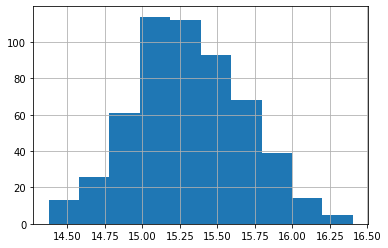

In [33]:
df.price.hist()#check if more uniform

In [34]:
df['area'] = np.log(df.area)#take log of area for uniform dist

<AxesSubplot:>

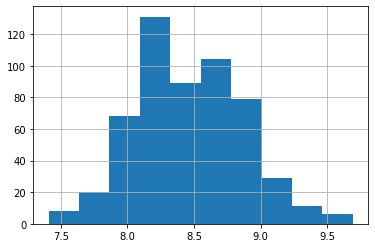

In [35]:
df.area.hist()#check if more uniform 

In [36]:
#make necessary imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold

In [37]:
#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price', 'parking'],axis=1), df.price, random_state=42, test_size=0.2)

In [38]:
linr = sm.OLS(y_train,X_train).fit()#fit ordinary least squares model to data

In [39]:
print(linr.summary())#view summary stats

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          2.766e+04
Date:                Sun, 26 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:51:09   Log-Likelihood:                         -355.32
No. Observations:                 436   AIC:                                      734.6
Df Residuals:                     424   BIC:                                      783.6
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [40]:
#create recursive feature elimination object
rfe = RFE(LinearRegression(), n_features_to_select=9)

#fit to data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=9)

In [41]:
#keep 9 most important features from rfe
X_train = X_train.loc[:, rfe.support_]
X_test = X_test.loc[:, rfe.support_]

In [42]:
#Show 9 most important columns
X_train.columns

Index(['area', 'bathrooms', 'stories', 'mainroad', 'basement',
       'hotwaterheating', 'airconditioning', 'prefarea', 'unfurnished'],
      dtype='object')

In [43]:
#create LR model
lm = LinearRegression()

In [44]:
#fit LR model to training set
lm.fit(X_train, y_train)

LinearRegression()

In [45]:
#make prediction on training set
predictions = lm.predict(X_train)

In [46]:
#calculate RMSE of training set
print(mean_squared_error(y_train,predictions, squared=False))

0.19071246779163842


In [47]:
#calculate r2 value of training set
r2_score(y_train, predictions)

0.7075532785049747

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)#kfolds cross validator object

In [50]:
cross_val_score(lm, X_train, y_train, cv=kf)#validate model

array([0.66956608, 0.65601609, 0.70781747, 0.72513671, 0.64788416])

In [51]:
predtest = lm.predict(X_test)#make prediction on test set

In [52]:
testr2score = r2_score(y_test, predtest)#calc r2 score for test

In [53]:
print(testr2score)#test set r2 score

0.6563598804080699


In [54]:
print(np.sqrt(mean_squared_error(y_test,predtest)))#rmse for test set

0.25759082909936837


In [55]:
#calculate the residuals
residuals = abs(y_test) - abs(predtest)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

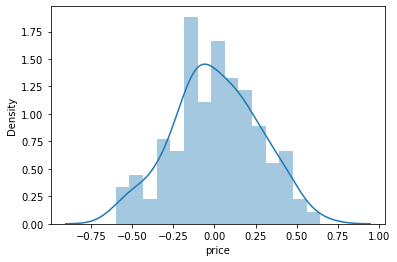

In [56]:
#check that residuals resemble a normal distribution
sns.distplot(residuals, bins=15)

In [57]:
#create an array that's the length of the residuals
x_axis = np.arange(0, len(residuals))

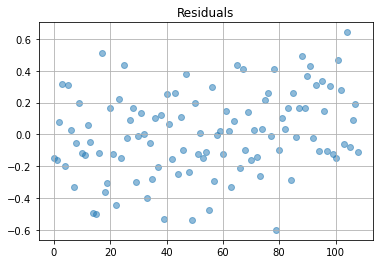

In [58]:
#plot residuals to test assumption of homoscedasticity
plt.scatter(x_axis, residuals, alpha=0.5)
plt.title("Residuals")
plt.grid()

In [59]:
#use Durbin Watson to check autocorrelation
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

2.3019509005818946

In [60]:
#import decision tree regressor
from sklearn.tree import DecisionTreeRegressor

In [61]:
#split the data into training and testing set again
X_train, X_test, y_train, y_test = train_test_split(df.drop(['price'],axis=1), df.price, random_state=42, test_size=0.2)

In [62]:
#Use recursive feature elimination to select 6 most important features
rfe = RFE(DecisionTreeRegressor(), n_features_to_select= 6)#rfe feature elimination

In [63]:
#fit rfe model
rfe.fit(X_train,y_train)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=6)

In [64]:
#filter train and test set for selected features
X_train = X_train.loc[:,rfe.support_]
X_test = X_test.loc[:,rfe.support_]

In [65]:
#DT hyperparameters to test
max_depth=[1,2,3,4,5,6,7,8,9,10]
min_samples_split=[2,3,4,5,6,7,8,9]
min_samples_leaf=[1,2,3,4,5,6,7,8,9,10]
min_weight_fraction_leaf=[0,0.1,0.2,0.3,0.4,0.5,0.6]
max_leaf_nodes=list(range(0,11))
min_impurity_decrease=list(range(0,11))
ccp_alpha=[0,0.1,0.2,0.3,0.4,0.5]

In [66]:
#Use loop to tune hyperparameters
for item in ccp_alpha:
        score = cross_val_score(DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=4, ccp_alpha=item), X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
        print(item)
        print(-np.mean(score))

0
0.24121727541581514
0.1
0.353698657560675
0.2
0.353698657560675
0.3
0.353698657560675
0.4
0.353698657560675
0.5
0.353698657560675


In [67]:
#create a decision tree regressor to predict housing price
dt = DecisionTreeRegressor(random_state=42, max_depth = 5, min_samples_split = 4)

In [68]:
#fit decision tree model
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=4, random_state=42)

In [69]:
#get training set predicitions
ypred = dt.predict(X_train)

In [70]:
#RMSE of training set
mean_squared_error(ypred, y_train, squared=False)

0.1909320479580257

In [71]:
#cross validation of DT model
np.mean(cross_val_score(dt, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')*-1)

0.24121727541581514

In [72]:
#STD DEVIATION of cross validation scores
np.std(cross_val_score(dt, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')*-1)

0.015301743745806663

In [73]:
#predict labels for testing set
pred_y = dt.predict(X_test)

#RMSE of test set
mean_squared_error(y_test, pred_y, squared=False)

0.30245339466070303